# Банк X — Анализ оттока клиентов

## Цель:

Проанализировать клиентов банка и выделить сегменты клиентов, которые склонны к оттоку.

- выделить характерные категории клиентов
- дать ключевые показатели оттока по категориям
- предложить варианты улучшения ключевых показателей отделу маркетинга для снижения оттока

## Содержание


### 1. [Загрузка данных.](#1.)
### 2. [Подготовка к исследованию.](#2.)
### 3. [Исследовательский анализ данных.](#3.)
### 4. [Формулировка и проверка гипотез.](#4.)
### 5. [Сегментация на основе анализа показателей и проверки гипотез.](#5.)
### 6. [Формулировка рекомендаций отделу маркетинга для воздействия на ключевые показатели для уменьшения оттока.](#6.)

<div class="alert btn-primary"><b>Ссылка на презентацию:</b><br>  <a href="https://disk.yandex.ru/i/t90X8nQ9ocxqXA">https://disk.yandex.ru/i/t90X8nQ9ocxqXA</a> </div>

<div class="alert btn-primary"><b>Ссылка на дашборд:</b><br>  <a href="https://public.tableau.com/views/Finalproject_16747598428020/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link"><b>ТАБЛО</b></a>   </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;✔️<br>
Обычно презентации делают для проектора, с альбомным расположением листа, а не с портретным (как у раздаточных материалов). Формат pdf, есть автор, в начале указаны цели, соблюдён баланс графической и текстовой информации, слайды по ключевым моментам работы:

* есть портрет отточных клиентов
* есть корреляционный анализ
* есть диаграммы по показателям в разрезе оттока и по уровню оттока
* есть выводы и рекомендации
</div><div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;⚠️<br>
Нет даты, на работу будет сложно сослаться.
</div>

<a class = "anchor" id = "1."></a>
### 1. Загрузка данных.

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Я заметил что первая ячейка имеет номер выполнения, отличный от <tt>[1]</tt>. Это может приводить к тому, что не вызовут ошибку какие-то изменения кода, которые вызвали бы ошибку после перезапуска ноутбука (или при его запуске на другой машине), например потому, что в памяти сохраняются переменные, которые были сформированы до того, как код был изменён. Поэтому важно выполнять ячейки с первой по последнюю строго последовательным образом перед тем, как отправлять их кому-то.
    
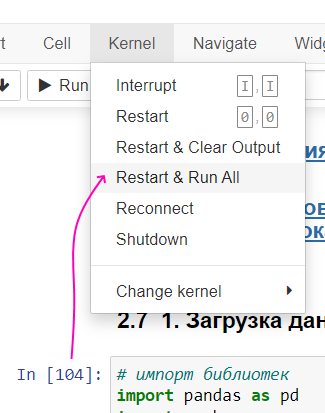
</div>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Хорошо, что в начале работы помещаешь описание проекта, это позволит читателям быстро понять, о чём работа. 

Импорт библиотек в самом начале позволит быстро понять, какое окружение нужно для ноутбука. Такой код проще поддерживать.

Если ты не используешь потом какие-то библиотеки или методы, их импорт можно закомментировать. Если передумаешь, то сможешь убрать пометки комментирования и всё снова заработает. 

<a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>Материал по импорту.</a> Также есть простые правила — не стоит импортировать дважды одно и то же, желательно разбивать импорт на группы (отделять друг от друга переносами строк и комментариями), при этом импорт <a href='https://docs.python.org/3/library/index.html'>стандартных библиотек</a> стоит размещать в начале.
</div>


In [2]:
# загрузка датасета
try:
    df_new = pd.read_csv("https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F")
except:
    df_new = pd.read_csv('bank_scrooge.csv')

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Можно загружать файлы, заранее проверяя методами <tt>os.path.isfile</tt> или <tt>os.path.exists</tt> существование файла. Для путей в интернете этот метод не годится.

При использовании конструкции try-except важно «отлавливать» конкретный вид ошибки, возникновение которой ты ожидаешь. Название ошибки обычно написано с заглавной буквы красным цветом в конце сообщения об ошибке. Немного <a href='https://tonais.ru/file/oshibka-filenotfounderror-python'>подробнее</a> об этом.
</div>

In [3]:
print(df_new.info())
display(df_new.head())
display(df_new.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB
None


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.837100,2.627600,8.277943e+05,1.874100,0.680400,0.523500,1.478669e+05,0.182200
std,33708.23812,65.448519,12.128507,1.980836,1.980614e+06,0.799946,0.466345,0.499472,1.393885e+05,0.386029
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,34.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<a class = "anchor" id = "2."></a>
### 2. Подготовка к исследованию.
* Анализ и удаление дубликатов
* Анализ и обработка пропусков

In [4]:
# Проверка на явные дубликаты
print(df_new.duplicated().sum())
df_new[df_new.duplicated()]

1


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9457,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0


In [5]:
df_new = df_new.drop_duplicates()

In [6]:
# приводим названия признаков к lower_case + посмотрим на содержание полей
df_new.columns = [x.lower() for x in df_new.columns]

for c in df_new.columns:
    print('--'*22)
    print(f'Количество уникальных значений {c}: {len(df_new[c].unique())}')
    display(df_new[c].unique())

--------------------------------------------
Количество уникальных значений userid: 9927


array([183012, 146556, 120722, ..., 115639, 148700,  96267], dtype=int64)

--------------------------------------------
Количество уникальных значений score: 348


array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

--------------------------------------------
Количество уникальных значений city: 3


array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

--------------------------------------------
Количество уникальных значений gender: 2


array(['Ж', 'М'], dtype=object)

--------------------------------------------
Количество уникальных значений age: 68


array([25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45,
       53, 40, 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71,
       73, 44, 49, 33, 32, 66, 29, 68, 69, 59, 21, 65, 57, 63, 80, 70, 77,
       64, 20, 18, 19, 78, 74, 76, 22, 75, 23, 81, 24, 83, 82, 84, 79, 86],
      dtype=int64)

--------------------------------------------
Количество уникальных значений equity: 10


array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

--------------------------------------------
Количество уникальных значений balance: 7702


array([  59214.82,  850594.33,        nan, ...,   78144.65,  865457.97,
       1180886.7 ])

--------------------------------------------
Количество уникальных значений products: 6


array([2, 3, 1, 4, 5, 0], dtype=int64)

--------------------------------------------
Количество уникальных значений credit_card: 2


array([0, 1], dtype=int64)

--------------------------------------------
Количество уникальных значений last_activity: 2


array([1, 0], dtype=int64)

--------------------------------------------
Количество уникальных значений est_salary: 9996


array([ 75719.14,  86621.77, 107683.34, ..., 108905.09,  86874.9 ,
        21422.37])

--------------------------------------------
Количество уникальных значений churn: 2


array([1, 0], dtype=int64)

In [7]:
duplicated_userid = set(df_new[df_new.duplicated('userid')]['userid'])
df_duplicated = df_new[df_new['userid'].isin(duplicated_userid)].sort_values(by = ['userid']).reset_index()

print(f'В датасете продублированы {len(duplicated_userid)} userid: \n {duplicated_userid}')
display(df_duplicated.head(10))

display(df_duplicated.describe())

В датасете продублированы 72 userid: 
 {162053, 140934, 163207, 150667, 221197, 214031, 220816, 216848, 199312, 217619, 185748, 222480, 181526, 188957, 226719, 126368, 152479, 191520, 200863, 124450, 168998, 206759, 217643, 195884, 190253, 208815, 117943, 211130, 116540, 120258, 210627, 164676, 123461, 187459, 217412, 170312, 163657, 160075, 219343, 127440, 208081, 141265, 210898, 227795, 183510, 210135, 140377, 148826, 131419, 155872, 208738, 217826, 221156, 185829, 210662, 202983, 143592, 210792, 171751, 228075, 198635, 151662, 172142, 221809, 175730, 187635, 197364, 155765, 218868, 226550, 149365, 129785}


,index,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
1,1893,116540,883.0,Ярославль,Ж,55,1,362756.49,3,0,1,175920.48,1
2,4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
3,7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
4,5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5,5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
6,8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
7,1411,123461,829.0,Рыбинск,Ж,59,0,96222.44,2,0,1,102771.55,1
8,8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
9,9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0


,index,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,144.000000,144.000000,144.000000,144.000000,144.000000,9.700000e+01,144.000000,144.000000,144.000000,144.000000,144.000000
mean,5369.604167,182657.930556,861.062500,40.930556,2.486111,1.136248e+06,2.041667,0.680556,0.659722,164803.306597,0.361111
std,3031.743569,33739.514983,68.052142,11.138450,2.187012,1.794320e+06,1.043629,0.467889,0.475456,162374.757854,0.481999
min,7.000000,116540.000000,663.000000,22.000000,0.000000,5.740567e+04,1.000000,0.000000,0.000000,17831.630000,0.000000
25%,2572.500000,154943.500000,823.750000,33.000000,0.000000,3.749596e+05,1.000000,0.000000,0.000000,84740.525000,0.000000
50%,5482.500000,188296.000000,879.500000,38.000000,3.000000,6.485940e+05,2.000000,1.000000,1.000000,130891.740000,0.000000
75%,8277.250000,210956.000000,913.500000,45.000000,4.000000,1.219918e+06,3.000000,1.000000,1.000000,176365.555000,1.000000
max,9970.000000,228075.000000,990.000000,77.000000,7.000000,1.464869e+07,5.000000,1.000000,1.000000,955144.850000,1.000000


#### Клиенты с продублированными userid имеют различные значения по всем признакам. Заменим продублированные userid на уникальные для дальнейшего анализа.

In [8]:
for index, row in df_new[df_new.duplicated('userid')].iterrows():
        str_id = str(row['userid'])
        str_id_new = '7' + str_id[1:]
        df_new.loc[index, ['userid']] = int(str_id_new)

df_new.duplicated('userid').sum()

0

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b> в реальных данных такое делать обычно причин нет, только если id не используется как индекс</div>

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894.0,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927.0,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
2318,168713,837.0,Ярославль,М,62,5,1.282321e+07,1,1,1,21765.76,0
7058,114087,878.0,Ярославль,М,61,5,1.235992e+07,2,0,1,56863.07,1
7597,156149,900.0,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0
9753,122015,885.0,Ярославль,М,64,4,2.572776e+07,3,1,0,168746.90,0


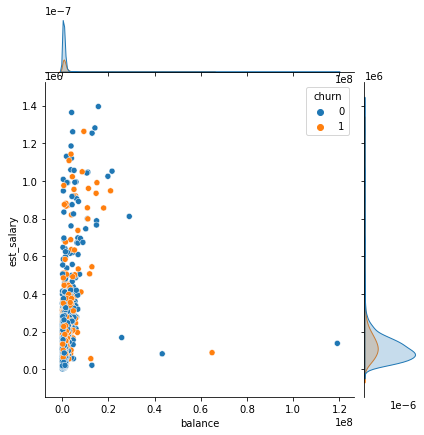

In [9]:
fig = sns.jointplot(
    data = df_new[~df_new['balance'].isna()], 
    x='balance',
    y='est_salary',
    hue = 'churn'
)
blowouts = df_new[(df_new['balance']>.1e+8)&(df_new['est_salary']<0.3e+6)] 
display(blowouts)

Наблюдаются выбросы значений `balance` среди пользователей Ярославля.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
По факту ты нигде дальше полный датасет не используешь, т.е. ты отбросил VIP-клиентов по сути. Причём по захардкоженым значениям отсечек, которые могут не подойти для других данных (когда исследование нужно будет повторять).
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Решил использовать датасет без выбросов только для регрессии, а в дальнейшем работать с полными данными   </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

#### Преобразование типов

In [10]:
df_new = df_new.astype(
    {'userid':'int32',
     'score':'int16',
     'age':'int8',
     'equity':'int8',
     'products':'int8',
     'credit_card':'int8',
     'last_activity':'int8',
     'churn':'int8'}
)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int32  
 1   score          9999 non-null   int16  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int8   
 5   equity         9999 non-null   int8   
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int8   
 8   credit_card    9999 non-null   int8   
 9   last_activity  9999 non-null   int8   
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int8   
dtypes: float64(2), int16(1), int32(1), int8(6), object(2)
memory usage: 765.8+ KB


<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

#### Обработка значений NaN в balance: замена NaN с помощью линейной регрессии

Удалим выбросы значений `balance` среди пользователей Ярославля для исключения их влияния на прогноз значений `balance`.

In [11]:
df = df_new.drop(blowouts.index,axis = 0)

In [12]:
display(df.describe())
display(df_new[df_new['balance'].isna()].describe())
display(df_new[df_new['balance'].isna()]['churn'].sum())

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9993.000000,9993.000000,9993.000000,9993.000000,7.699000e+03,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000
mean,175874.714900,848.668468,42.827379,2.626639,7.923091e+05,1.874012,0.680376,0.523366,1.478765e+05,0.182127
std,58841.071466,65.456469,12.124336,1.980691,1.106239e+06,0.799969,0.466354,0.499479,1.394060e+05,0.385969
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142966.000000,802.000000,34.000000,0.000000,2.953926e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000
50%,173088.000000,853.000000,40.000000,3.000000,5.239057e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000
75%,201628.000000,900.000000,51.000000,4.000000,9.780194e+05,2.000000,1.000000,1.000000,1.745023e+05,0.000000
max,799312.000000,1000.000000,86.000000,9.000000,2.900893e+07,5.000000,1.000000,1.000000,1.395064e+06,1.000000


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2294.000000,2294.000000,2294.000000,2294.000000,0.0,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000
mean,180452.239756,865.324324,41.853095,0.051003,NaN,1.162162,0.815606,0.549695,2.262424e+05,0.005667
std,76706.800711,89.612766,11.738678,0.225918,NaN,0.402606,0.387890,0.497633,1.997889e+05,0.075082
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143617.250000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203222e+05,0.000000
50%,173450.000000,903.000000,39.500000,0.000000,NaN,1.000000,1.000000,1.000000,1.741182e+05,0.000000
75%,202244.750000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.398888e+05,0.000000
max,799312.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


13

Значения `balance` отсутствуют у 2294 записей, отосящихся большей частью к клиентам без оттока.
Их можно отнести к `Missing At Random`.
Т.о. для дальнейшего анализа целесообразно заменить пропуски на предсказания стохастической регрессионной модели, обученной на остальной выборке с `churn` == 0.

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
У нас работа, связанная с анализом данных, а не с дата-саенсом и машин-лёнингом. Пожалуйста, сделай вывод о том, к какому из типов принадлежат пропуски: MCAR, MAR или MNAR
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Отток по userid с отсутствующими данными практически нулевой, поэтому учтём это в регрессии. Соответственно пропуски - MAR   </div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🚫<br>
Да, т.к. есть связь пропусков с данными (в частности с оттоком), то значит пропуски распределены не рандомно (т.е. MNAR)
</div>

In [14]:
# разделим данные на признаки и целевую переменную
X = df[~(df['balance'].isna())&(df['churn'] == 0)].drop(columns = ['balance','city','userid','gender'], axis=1)
y = df[~(df['balance'].isna())&(df['churn'] == 0)]['balance']

scaler = StandardScaler()
scaler.fit(X) 
scaled_df = scaler.transform(X)

In [15]:
# стандартизация выборки для прогноза
pr = df_new[df_new['balance'].isna()].drop(columns = ['balance','city','userid','gender'], axis=1)
scaler.fit(pr)
scaled_df_pr = scaler.transform(pr)

In [16]:
linear_regression_model = SGDRegressor(
    loss='epsilon_insensitive',
    penalty = 'l2',
    tol=.0001,
    eta0=.01) 
linear_regression_model.fit(scaled_df, y)

predictions = linear_regression_model.predict(scaled_df_pr)

df_new.loc[df_new['balance'].isna(),'balance'] = predictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9993.000000,9993.000000,9993.000000,9993.000000,7.699000e+03,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000
mean,175874.714900,848.668468,42.827379,2.626639,7.923091e+05,1.874012,0.680376,0.523366,1.478765e+05,0.182127
std,58841.071466,65.456469,12.124336,1.980691,1.106239e+06,0.799969,0.466354,0.499479,1.394060e+05,0.385969
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142966.000000,802.000000,34.000000,0.000000,2.953926e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000
50%,173088.000000,853.000000,40.000000,3.000000,5.239057e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000
75%,201628.000000,900.000000,51.000000,4.000000,9.780194e+05,2.000000,1.000000,1.000000,1.745023e+05,0.000000
max,799312.000000,1000.000000,86.000000,9.000000,2.900893e+07,5.000000,1.000000,1.000000,1.395064e+06,1.000000


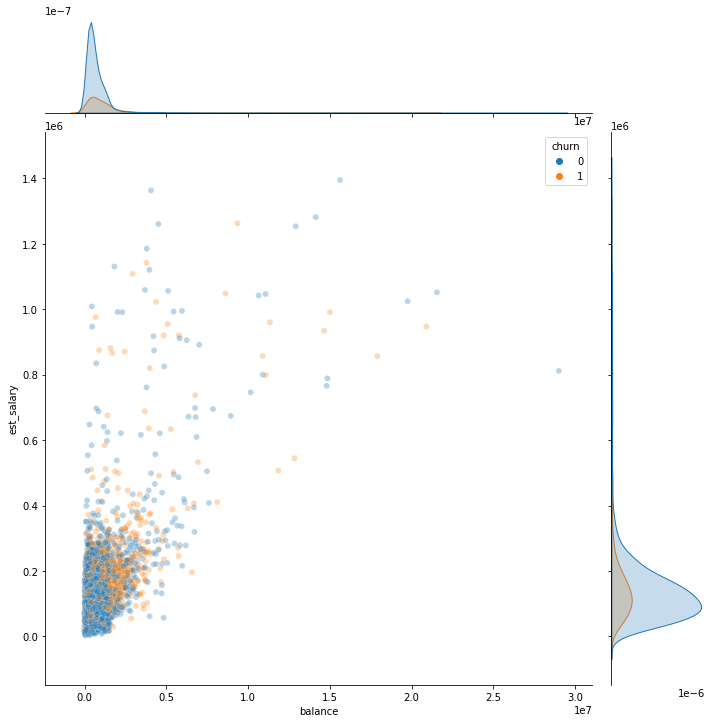

In [17]:
display(df.describe())
sns.jointplot(
    data = df,
    x = 'balance',
    y = 'est_salary',
    hue = 'churn',
    kind='scatter',
    height = 10,
    joint_kws={'alpha':0.3,
#                's':5
              }
)

<a class = "anchor" id = "3."></a>
### 3. Исследовательский анализ.
1) Вывод общего % оттекающих

2) Распределения клиентов по оттоку
* гистограмма в разрезе score
* гистограмма в разрезе age
* гистограмма в разрезе balance
* гистограмма в разрезе est_salary
* распределение по city
* распределение по gender
* распределение по equity
* распределение по credit_card
* распределение по last_activity

3) Корреляционная матрица `churn rate` с признаками

4) Выделение ключевых признаков для оттока

5) Определение ориентировочных границ признаков по оттоку/удержанию клиентов

#### % оттока на текущий момент

In [18]:
print(f"Процент оттока: {df_new['churn'].sum()/df_new['churn'].count():.2%}")

Процент оттока: 18.22%


In [19]:
cat_col = [
    'city', 
    'gender',
    'credit_card', 
    'last_activity',
]

num_col = [
    'score',
    'age',
    'equity',
    'products',
    'balance',
    'est_salary',

]

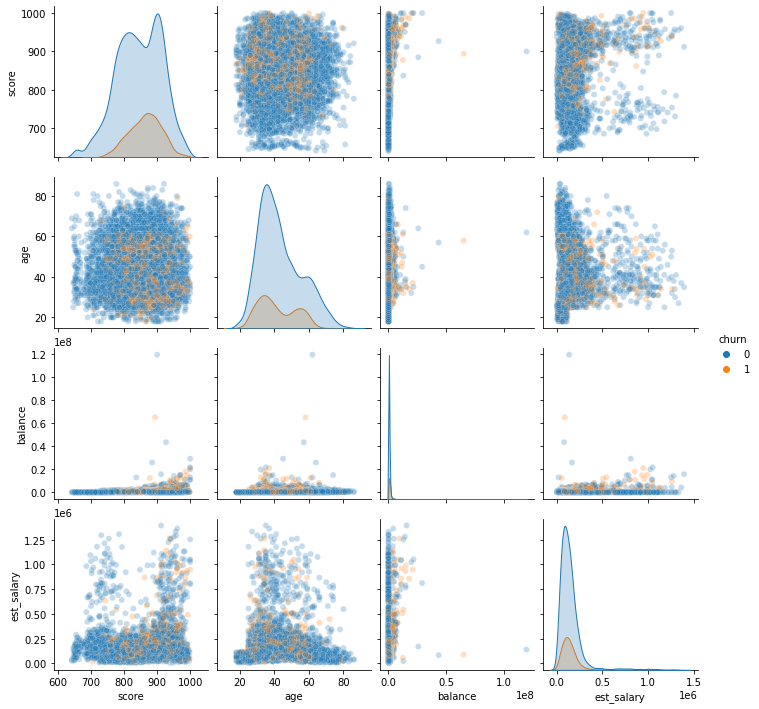

In [20]:
 sns.pairplot(
     data = df_new[['score','age','balance','est_salary','churn']],
     hue = 'churn',
     plot_kws={'alpha':0.25}
        )

Почти нет оттока среди клиентов:
* `score` до 740
* `age` от 65
* `est_salary`от 400000 + `score` до 850

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Обрати внимание, с таким размером точек и без прозрачности можно сделать неверные выводы, если в датасете строки неравномерно распределены (начало датасета сильно отличается от конца).
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Спасибо, исправил   </div>

#### Гистограммы `score`, `age`, `equity`, `est_ salary`, `balance`

In [21]:
# Функция для вывода гистограммы и violinplot

def hist_violin(x, data = df_new, xlim = (0, 0), hue = 'churn'):
    colors = sns.color_palette('dark')
    
    plt.figure(figsize = (20,5))
    h1 = sns.histplot(
        data = data,
        x = x,
        multiple= 'fill',
        kde = True,
        hue= hue,
        ax = plt.subplot(1,3,1)
    )
    h1.axhline(data['churn'].sum()/data['churn'].count(), color = 'r')
    
    plt.xlim(xlim)
    plt.title(f'Norm Hist {x} в разрезе по оттоку\n значения от {xlim[0]} до {xlim[1]}', size = 15)
    
    sns.histplot(
        data = data,
        x = x,
        multiple= 'stack',
        kde = True,
        hue= hue,
        ax = plt.subplot(1,3,2)
    )
    plt.xlim(xlim)
    plt.title(f'Hist {x} в разрезе по оттоку\n значения от {xlim[0]} до {xlim[1]}', size = 15)
    
    sns.violinplot(
        data = data,
        x = x,
        hue = hue,
#         split = True,
        ax = plt.subplot(1,3,3)
    )
    plt.xlim(xlim)
    plt.title(f'Violin {x} в разрезе по оттоку\n значения от {xlim[0]} до {xlim[1]}', size = 15)

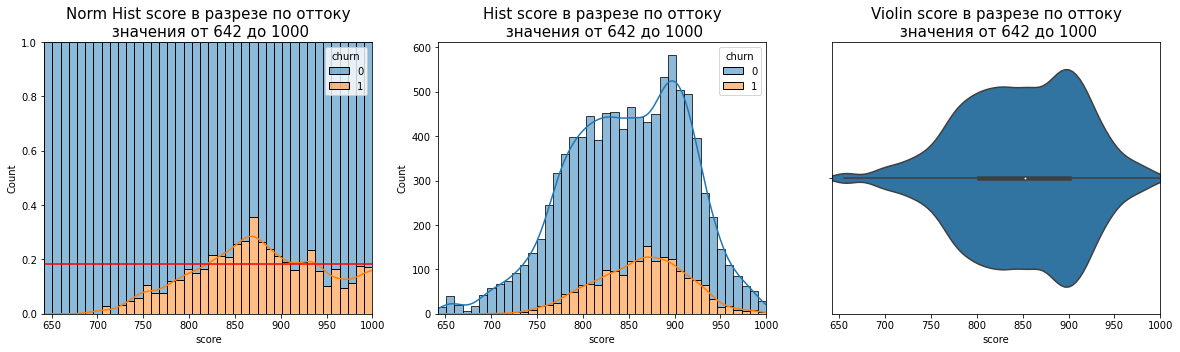

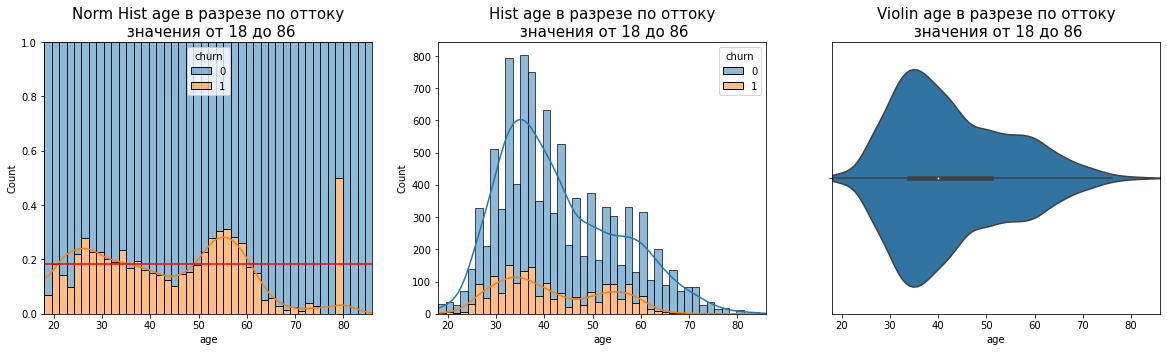

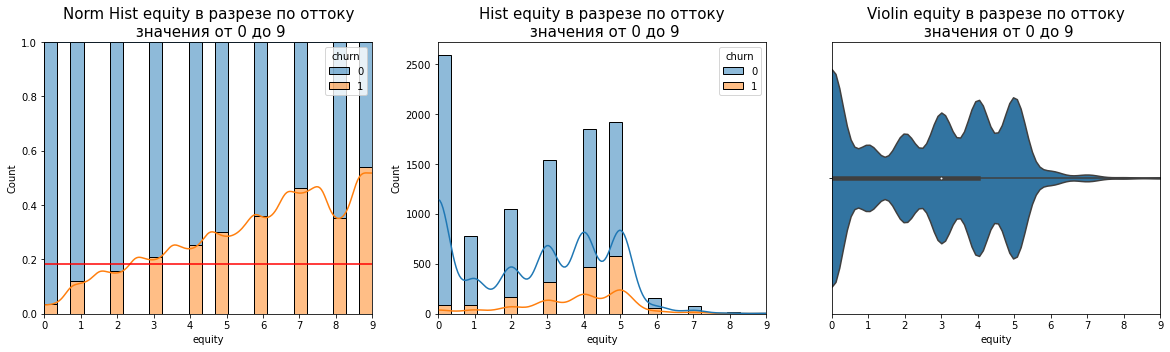

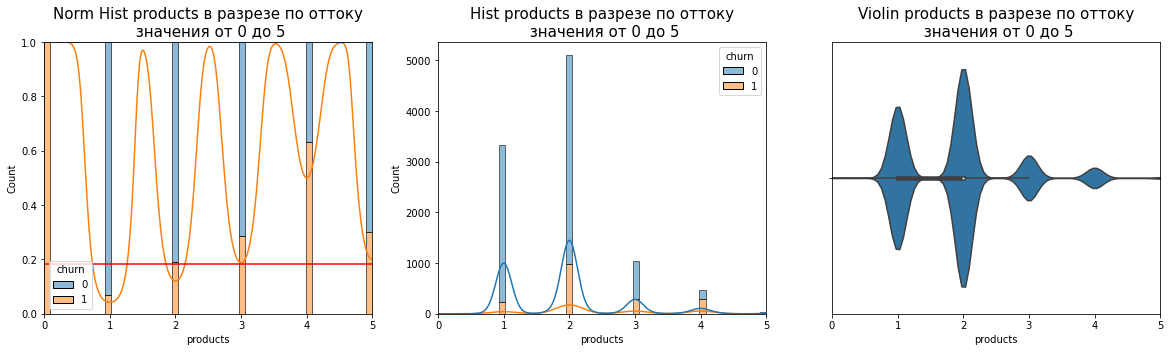

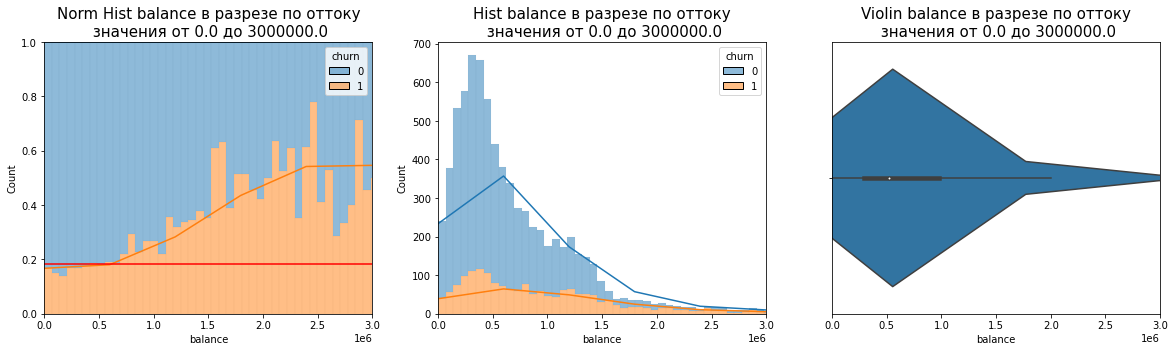

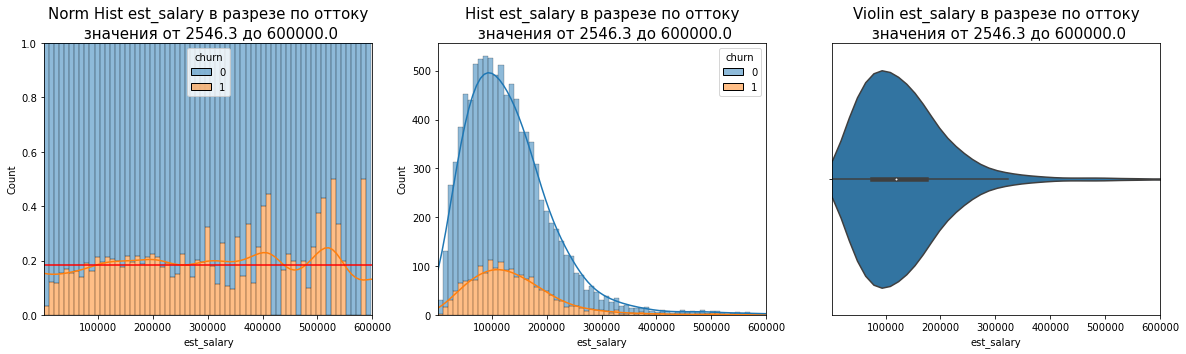

In [22]:
for i, col in enumerate(num_col[0:4]):
    hist_violin(x = col, xlim = (min(df[col]), max(df[col])))
    
hist_violin(x = 'balance', xlim = (min(df['balance']), 0.3e+07))
hist_violin(x = 'est_salary', xlim = (min(df['est_salary']), 6e+05))

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Очень крутой цикл.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
У нас датасет несбалансирован уже потому, что у нас отточных сильно меньше, чем неотточных.
</div>

##### ВЫВОДЫ 3.1.:

- существует часть клиентов, подверженных оттоку, диапазон `score` от 820 до 940.
- относительно высокий отток в возрастах 25-35 и 50-60 лет.
- есть рост оттока по `balance` от 0,6 млн.
- по `equity` зависимость оттока от их количества линейна, максимум по количесту userid приходится на 3-5.
- по `est_salary` групп оттока выделить не получается
- по `products` выше среднего по датасету отток у клиентов с 3-5 продуктами банка, в абсолютном выражении большинство в оттоке - 2 продуктами.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Чтобы сделать более точные выводы, на графике Norm Hist можно добавить горизонтальную линию среднебанковского оттока.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Внёс изменения   </div>

#### Распределения `city`, `gender`, `credit_card`, `last_activity`, `products`'.

In [23]:
# Функция для вывода countplot и pie для категориальных признаков
def countplot_pie(x, data = df_new, hue = 'churn'):
    
    groupby = data.groupby([x,hue]).agg({'userid':'count'})
    groupby.reset_index(inplace = True)
    
#     colors = sns.color_palette('dark')
    
    plt.figure(figsize = (20,4))
    plt.subplot(1,len(groupby[x].unique())+1,1)
    sns.countplot(
        data = data,
        x = x,
        dodge = False,
        hue = hue,
        orient = 'h',
#         palette = colors
                )

    plt.title(f'Распределение по {x} \nв разрезе оттока', size = 15)
    
    groupby = data.groupby([x,hue]).agg({'userid':'count'})
    groupby.reset_index(inplace = True)
    
    plt.suptitle(f'Churn в категории {x} по сегментам', size = 15)
    
    for i,n in enumerate(groupby[x].unique()):
        plt.subplot(1,len(groupby[x].unique())+1,i + 2)
        plt.pie(groupby[groupby[x]==n]['userid'],
                explode = [0.15,0],
                shadow = True,
#                 colors = colors,
#                 labels = groupby[groupby[x]==n][hue],
                startangle = 90,
                autopct = '%0.0f%%',
               )
        plt.title(n)
    
    plt.show()

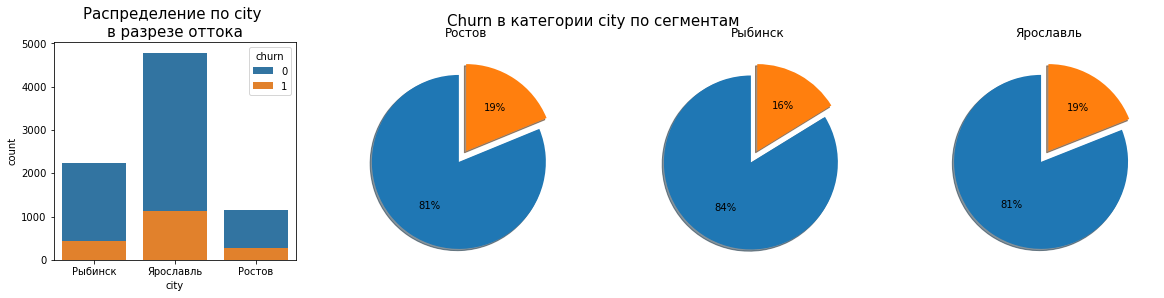

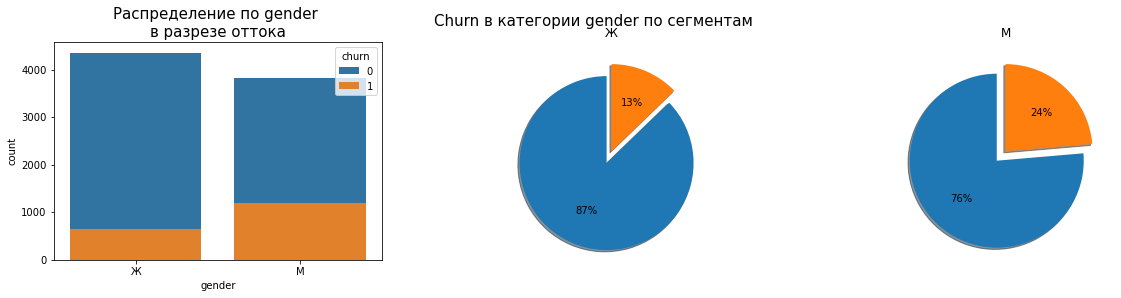

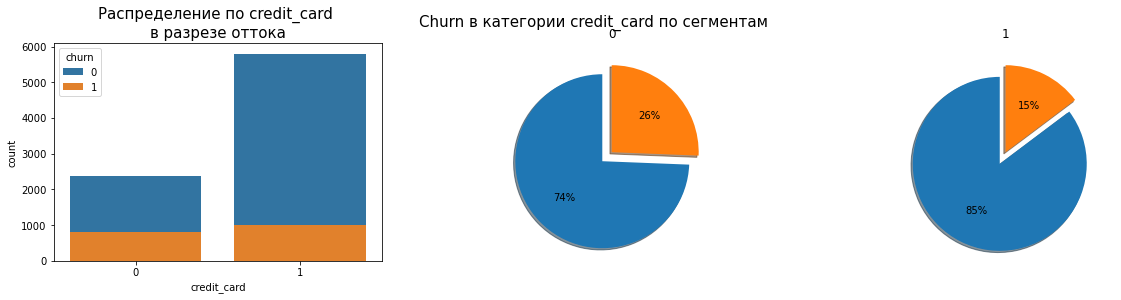

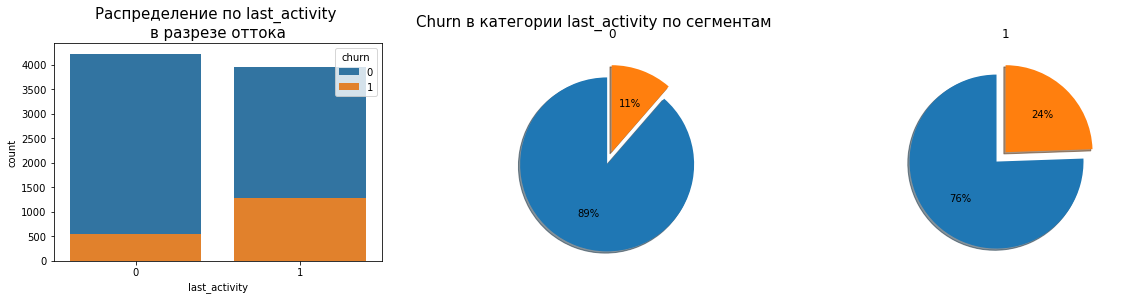

In [24]:
for cat in cat_col:
    countplot_pie(cat)

#### ВЫВОДЫ 3.2.:

- Значительно большая часть оттока приходтся на мужчин - порядка 24% против 13% у женщин
- Значительный отток идёт по клиентам без кредитной карты, 26% против 15%
- Клиенты с признаком `last_activity` уходят в отток чаще, чем без него, 24% / 11%
- Доля оттока по разным городам примерно равна.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

#### Корреляция churn rate с признаками

<AxesSubplot:>

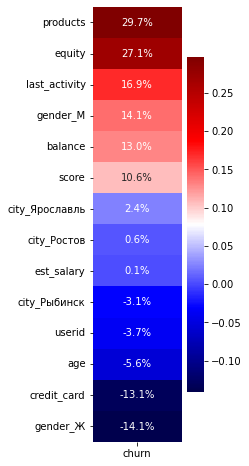

In [25]:
# корреляционная матрица нестандарзизированных признаков heatmap
df_dumm_for_matrix = pd.get_dummies(df_new)

df_corr = df_dumm_for_matrix.corr()

plt.figure(figsize=(2,8))
sns.heatmap(
    df_dumm_for_matrix.corr()[['churn']].drop('churn').sort_values(by = 'churn', ascending = False),
    annot = True,
    fmt='.1%',
    cmap='seismic'
)

Заметна слабая прямая корреляция `churn` с `products`, `equity`,очень слабая с `last_activity` и `мужчинами`.

Заметна слабая обратная корреляция с наличием `credit_card` и `женщинами`.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
В презентации будет хорошо смотреться heatmap в один столбец (churn) из этой корреляционной матрицы, отсортированный по величине корреляции, но без самой строки (churn). Её можно убрать методом drop
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Так изначально и думал сделать, оставил полную матрицу лишь, чтобы продемонстрировать корреляцию ЗП с балансом + `products` с `equity` </div>

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста закодируй города, чтобы они попали в эту матрицу.
</div>

### Вывод по границам значений признаков оттока.

#### Ключевые признаки и границы:

- `score` от 751 до 938.
- `age` 25-40 и 50-60.
- `balance` от 0,6 млн.
- по `equity` зависимость оттока от их количества линейна, максимум по количесту userid приходится на 3-5.
- `products` максимум по количесту userid приходится на 3-5, минимальный отток у пользующихся 1 продуктом.
- В Рыбинске отток чуть меньше, чем в Ярославле и Ростове.
- `gender` мужчины более подвержены оттоку.
- `credit_card` по клиентам без кредитной карты отток выше.
- `last_activity` давно не имевшие активности уходят в отток чаще.

#### Типичный портрет клиентов, подверженных оттоку:

* мужчины 25-40 и 50-60 лет
* скоринг от 751 до 938
* `balance` от 0.6 млн.
* активно пользуются несколькими продуктами банка, больше 2х
* имеют `equity` больше 2х
* недавно обращались в банк.
* не пользуются кредитной картой.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>👍</big></b></div>

<a class = "anchor" id = "4."></a>
### 4. Формулировка и проверка гипотез.
1) Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались, t-test.
* H0 `balance` для оттекшей и неоттекшей части клиентов не отличаются
* H1 `balance` для оттекшей и неоттекшей части клиентов различны

2) Гипотеза различия в оттоке между городами, z-test.
* H0 доли оттекших клиентов в Рыбинске, Ярославле и Ростове не различаются
* H1 доли оттекших клиентов в Рыбинске, Ярославле и Ростове различны. 

3) Влияние использования продуктов банка на отток, z-test
* H0 доли оттекших клиентов, пользующихся 1 продуктом и 2 и более одинаковы
* H1 доли оттекших клиентов, пользующихся 1 продуктом и 2 и более различны

<a class = "anchor" id = "4.1."></a>
#### 4.1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались, t-test.

* H0 `balance` для оттекшей и неоттекшей части клиентов не отличаются
* H1 `balance` для оттекшей и неоттекшей части клиентов различны

In [26]:
balance_churned = df[df['churn'] == 1]['balance'].dropna()
balance_not_churned = df[df['churn'] == 0]['balance'].dropna()

alpha = 0.05
print(f'Средний balance группы оттока: {balance_churned.mean():.2f}')
print(f'Средний balance группы НЕ оттока: {balance_not_churned.mean():.2f}')
print(f'% превышения balance группы оттока: {balance_churned.mean()/balance_not_churned.mean()-1:.2%}')

Средний balance группы оттока: 1091803.78
Средний balance группы НЕ оттока: 700457.90
% превышения balance группы оттока: 55.87%


In [27]:
churned_result = st.normaltest(balance_churned, nan_policy = 'omit')
not_churned_result = st.normaltest(balance_not_churned, nan_policy = 'omit')

print('p-value нормального распределения balance_churned:',churned_result.pvalue, 'данные распределены НЕ нормально')
print('p-value нормального распределения balance_not_churned:',not_churned_result.pvalue, 'данные распределены НЕ нормально')

if (np.var(balance_churned)/np.var(balance_not_churned))<4:
    print('Дисперсии выборок не отличаются')
else:
    print('Дисперсии отличаются')

p-value нормального распределения balance_churned: 0.0 данные распределены НЕ нормально
p-value нормального распределения balance_not_churned: 0.0 данные распределены НЕ нормально
Дисперсии выборок не отличаются


<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;👀<br>
При каких условиях мы не можем проводить t-test Стьюдента? Если дисперсии отличаются — не можем?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Если дисперсии отличаются сильно - не можем и если распределение не нормально. Получается, подходит тест Манна-Уитни.. </div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;📌<br>
Так как выборки большие, то нам неважно, что они распределены ненормально, мы можем использовать t-критерий. Требование нормальности распределения происходит из медицинской литературы, где традиционно маленькие выборки. 
    
Цитирую теорию (Спринт 5, Тема 4/6, Проверка гипотез):
<blockquote>Выборочные средние должны быть нормально распределены.
А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Очень часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста это необязательно.</blockquote>
Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов.

При разном размере выборок, который нам тут известен мы ставим equal_var в положение False просто из-за особенностей работы метода ttest_ind. И вообще, надёжнее при любых сомнениях ставить его в это положение, это лишь немного снижает мощность данного стат критерия. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. В литературе встречаются утверждения, что его нельзя проводить, если есть значительное число повторяющихся значений или если выборки большие, однако это относится, видимо, к старым реализациям теста.
</div>

In [28]:
results = st.mannwhitneyu(
    balance_not_churned,
    balance_churned,
#     nan_policy = 'omit',
)

print(f'p-значение t-теста: {results.pvalue}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница в среднем балансе статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение t-теста: 3.411229118351292e-70
Отвергаем нулевую гипотезу: разница в среднем балансе статистически значима


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>
<s>Не стоит округлять p-value, оно очень редко равно нулю, если оно очень малое, то его стоит выводить в экспоненциальной записи с ограничением числа значимых цифр (<code>f"{value:.2e}"</code>). Т.к. если p-value оказалось меньше самого маленького числа в питоне и приравнялось точно к нулю, то это повод проверить расчёты. 
</div>

<a class = "anchor" id = "4.2."></a>
#### 4.2. Гипотеза различия в оттоке между городами, z-test.

* H0 доли оттекших клиентов в Рыбинске, Ярославле и Ростове не различаются
* H1 доли оттекших клиентов в Рыбинске, Ярославле и Ростове различны. 

In [29]:
from statsmodels.stats.proportion import proportions_ztest

In [30]:
proportions_ztest(
    [df_new[df_new['city']=='Ярославль']['churn'].sum(),df_new[df_new['city']=='Ростов']['churn'].sum()],
    [df_new[df_new['city']=='Ярославль']['churn'].count(),df_new[df_new['city']=='Ростов']['churn'].count()]
)

(0.1609702557383338, 0.8721168275838381)

In [31]:
def z_test_churn(set_1,set_2,data = df_new,column = 'city',prop = 'churn', alpha = 0.05):
    
    churn1 = data[data[column] == set_1][prop].sum()
    all1 = data[data[column] == set_1][prop].count()
    p1 = churn1 / all1

    churn2 = data[data[column] == set_2][prop].sum()
    all2 = data[data[column] == set_2][prop].count()
    p2 = churn2 / all2
    
    z_value, p_value = proportions_ztest(
        [churn1,churn2],
        [all1,all2]
    )

    print(f'Доля {prop} в {set_1}: {p1:.2%}')
    print(f'Доля {prop} в {set_2}: {p2:.2%}')
    print(f'Доля {prop} в {set_1} больше {set_2} на {p1/p2 - 1:.2%}')

    print(f'p-значение: {p_value}')

    if p_value < alpha:
        print(f'\nОтвергаем нулевую гипотезу: между долями {prop} в {set_1} и {set_2} есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Конкретно этот тест нету необходимости реализовывать самому, есть <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html'>библиотеки</a>, которые делают это за нас.
</div>

In [32]:
alpha3 = 1 - (1-alpha)**(1/3)

z_test_churn(set_1 = 'Ярославль', set_2 = 'Ростов', column = 'city',alpha = alpha3)
print()
z_test_churn(set_1 = 'Рыбинск', set_2 = 'Ростов', column = 'city')
print()
z_test_churn(set_1 = 'Ярославль', set_2 = 'Рыбинск', column = 'city')

Доля churn в Ярославль: 18.98%
Доля churn в Ростов: 18.80%
Доля churn в Ярославль больше Ростов на 0.99%
p-значение: 0.8721168275838381
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доля churn в Рыбинск: 16.22%
Доля churn в Ростов: 18.80%
Доля churn в Рыбинск больше Ростов на -13.70%
p-значение: 0.03697179105689035

Отвергаем нулевую гипотезу: между долями churn в Рыбинск и Ростов есть значимая разница

Доля churn в Ярославль: 18.98%
Доля churn в Рыбинск: 16.22%
Доля churn в Ярославль больше Рыбинск на 17.02%
p-значение: 0.00213254034129041

Отвергаем нулевую гипотезу: между долями churn в Ярославль и Рыбинск есть значимая разница


<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;👀<br>
Какой тут общий вывод по сформулированной выше нулевой гипотезе "H0 доли оттекших клиентов в Рыбинске, Ярославле и Ростове не различаются"? Нужна ли тут коррекция уровня значимости?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Вывод про Рыбинск ниже - в нём меньшая доля, результат статистически значим. Отток в Ярославле и Ростове отличается менее, чем на 1%.

Про уровень значимости, мне кажется, всё корректно.</div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🚫<br>
Нет, при множественных проверках, когда нам надо установить, что хотя бы один элемент отличается, нам нужно (по числу нулевых гипотез) <a href='https://ru.wikipedia.org/wiki/Поправка_на_множественную_проверку_гипотез'>делать поправки уровня значимости</a>, уменьшая его. Тут у нас p-value такие, что результат от поправки не изменится, но важно освоить верную методику, особенно если проверок много (Бонферрони при этом лучше не брать, он чрезмерно снижает уровень значимости, лучше Шидака.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Да, вспомнил, спасибо.</div>

#### Вывод:
Есть статистически значимая разница оттоке по Рыбинску по отношению к оттоку в Ростове и Ярославле.

В Рыбинске отток меньше примерно на 15%

<a class = "anchor" id = "4.3."></a>
#### 4.3. Влияние использования продуктов банка на отток, z-test.

* H0 доли оттекших клиентов, пользующихся 1 продуктом и 2 и более одинаковы
* H1 доли оттекших клиентов, пользующихся 1 продуктом и 2 и более различны

In [33]:
p1 = df[(df['products']==1)&(df['churn'] == 1)]['churn'].count()/df[df['products']==1]['churn'].count()
p2 = df[(df['products'].isin(range(3,6)))&(df['churn'] == 1)]['churn'].count()/df[df['products'].isin(range(3,6))]['churn'].count()
    
p_combined = (
    df[(df['products']==1)&(df['churn'] == 1)]['churn'].count() + df[(df['products'].isin(range(3,6)))&(df['churn'] == 1)]['churn'].count()
    )/(
        df[df['products']==1]['churn'].count() + df[df['products'].isin(range(3,6))]['churn'].count()
    )
    
difference = p1-p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (
    1/df[df['products']==1]['churn'].count() + 1/df[df['products'].isin(range(2,6))]['churn'].count()))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
    
print(f'Доля оттока в products = 1: {p1:.2%}')
print(f'Доля оттока в products от 3 до 5: {p2:.2%}')
print(f'Доля оттока в products от 3 до 5 больше оттока products = 1 на {p1/p2 - 1:.2%}')

print(f'p-значение: {p_value:2e}')

if p_value < alpha:
    print(f'\nОтвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Доля оттока в products = 1: 7.04%
Доля оттока в products от 3 до 5: 39.21%
Доля оттока в products от 3 до 5 больше оттока products = 1 на -82.05%
p-значение: 0.000000e+00

Отвергаем нулевую гипотезу: между долями есть значимая разница


<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

<a class = "anchor" id = "5."></a>
### 5. Сегментация на основе показателей и проверки гипотез.

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>Пожалуйста, учти мой комментарий с декомпозиции:
<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Кластеризация это не сегментация. Кластеризация не решит поставленной задачи. Кластер может быть негомогенным и выделяется он без учёта оттока, либо неприменим для новых клиентов, если выделяется с использованием оттока.
</div></div>

1) Кластеризация linkage для определения числа сегментов.

2) Кластеризация K-Means. В цикле по кол-ву кластеров.

3) Расчёт среднего оттока для каждого кластера. Оценка различий в ключевых показателей оттока клиентов по кластерам.

4) Финальное описание кластеров клиентов для маркетинга 

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [35]:
# Отрисовка дендрограммы иерархической агломеративной кластеризации
df_dummies = df_new.drop(columns = ['userid','churn'])
df_dummies = pd.get_dummies(df_dummies)

X = df_dummies

scaler.fit(X)
X_sc = scaler.transform(X)

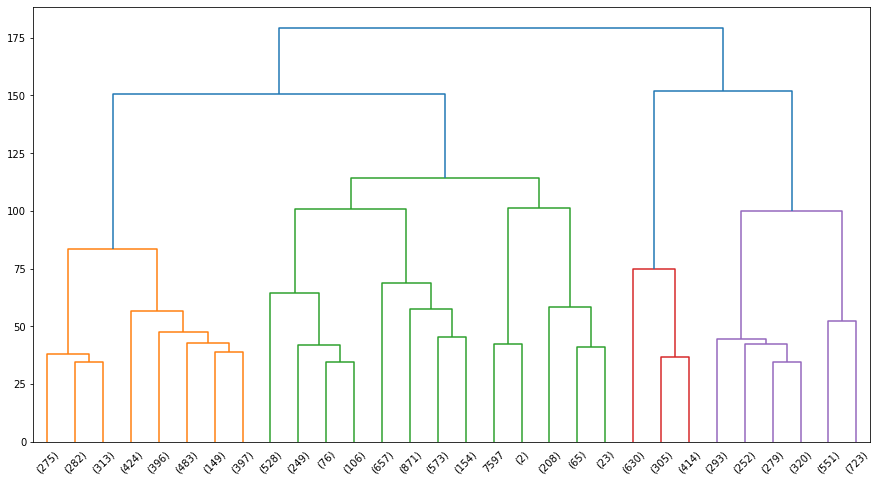

In [36]:
linked = linkage(X_sc,
                 method = 'ward'
                )

plt.figure(figsize=(15, 8))  
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp'
          )
plt.title('')
plt.show()

Взяв горизонталь ниже 140 видим, то количество кластеров может быть от 4х до 8

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Я советовал указывать <tt>truncate_mode = "last_p"</tt> для таких графиков, иначе они очень долго рисуются.
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

#### Кластеризация с помощью K-Means

In [37]:
n_clust = range(4,9)

for n in n_clust:

    kmeans_model = KMeans(n_clusters=n,init='k-means++')
    kmeans_model.fit(X_sc)
    df_new['km_' + str(n)+'_clusters'] = kmeans_model.labels_
    print('km_' + str(n)+'_clusters')

km_4_clusters
km_5_clusters
km_6_clusters
km_7_clusters
km_8_clusters


#### Расчёт среднего оттока для каждого кластеров. Оценка различий в ключевых показателей оттока клиентов по кластерам.

In [38]:
def m_w_ratio(x):
    return list(x).count('М')/len(x)

def city(x):
    return str(
        x.value_counts().reset_index().sort_values(by ='city',ascending = False)['index'][0]
    ) + ' :' + str(round(
        x.value_counts().reset_index().sort_values(by ='city',ascending = False)['city'][0]/len(x),2))

feat_dict = {
    'userid':'count',
    'gender': m_w_ratio,
    'churn':['sum','mean'],
    'score':['mean',np.std,'median'],
    'age':['mean',np.std,'median'],
    'balance':['mean',np.std,'median'],
    'credit_card':'mean',
    'last_activity':'mean',
    'products':['mean',np.std,'median'],
    'equity':['mean',np.std,'median'],
    'city':city
}

for i in [
    'km_6_clusters',
    'km_7_clusters',
]:
#     df[i]
    print('Кластеризация ',i)
    display((df_new.groupby(i).agg(feat_dict)).sort_values(by = [('gender','m_w_ratio'),('churn','sum')]).style.background_gradient(cmap='coolwarm', axis=0))

Кластеризация  km_6_clusters


Кластеризация  km_7_clusters


In [39]:
groups = {
    'group_4':{
        'age':[47,62],
        'score':[751,940],
        'credit_card':[0],
        'gender':['М'],
        'products':[2,5],
   },
    'group_3':{
        'age':[25,40],
        'score':[751,940],
        'credit_card':[0],
        'gender':['М'],
        'products':[2,5],
    },
    'group_2':{
        'balance':[0.6e+6,1e+8],
        'last_activity':[1],
        'credit_card':[1],
    },
    'group_1':{
        'products':[2,5],
        'equity':[3,10],
        'last_activity':[1],
        'credit_card':[0],
    },
}

In [40]:
def markup(data):
    data['groups'] = 'others'
    for gr in groups:
        index = set(data.index)
        for feat in groups[gr]:
            if feat in num_col:
                index -= set(data[~((data[feat]>=groups[gr][feat][0]) & (data[feat]<=groups[gr][feat][1]))].index)     
            else:
                index -= set(data[~(data[feat] == groups[gr][feat][0])].index)

        data.loc[data.index.isin(index),['groups']] = gr

In [41]:
markup(df_new)

print(df_new['groups'].value_counts())

def m_w_ratio(x):
    return list(x).count('М')/len(x)

feat_dict = {
    'userid':'count',
    'gender':m_w_ratio,
    'churn':['sum','mean'],
    'score':['mean'],
    'age':['mean'],
    'equity':['mean'],
    'products':['mean'],
    'balance':['mean'],
    'est_salary':['mean'],
    'credit_card':['mean'],
    'last_activity':['mean']

}

display(df_new.groupby('groups').agg(feat_dict).sort_values(by = [('churn','mean')],ascending = False).style.background_gradient( axis=0))

others     7440
group_1    1166
group_2     980
group_3     256
group_4     157
Name: groups, dtype: int64


ИТЕРАЦИЯ 2

In [42]:
df_new2 = df_new[~(df_new['groups'].isin(['group_1','group_2']))]
print(len(df_new2))
print(f"% оттока: {(df_new2[df_new2['churn']==1]['churn'].sum()/df_new2['churn'].count()):.2%}")

7853
% оттока: 11.73%


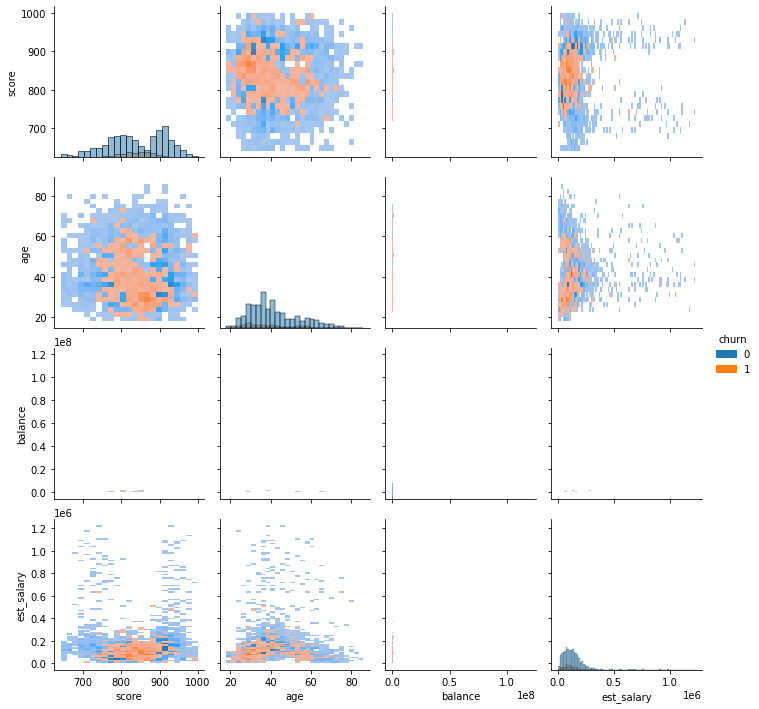

In [43]:
 sns.pairplot(
     data = df_new2[df_new2['last_activity']==1][['score','age','balance','est_salary','churn']],
     hue = 'churn',
     kind = 'hist',
 )

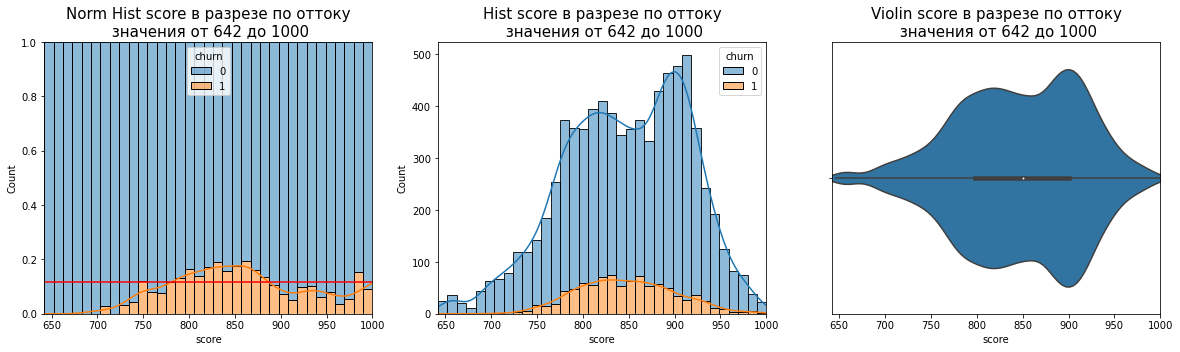

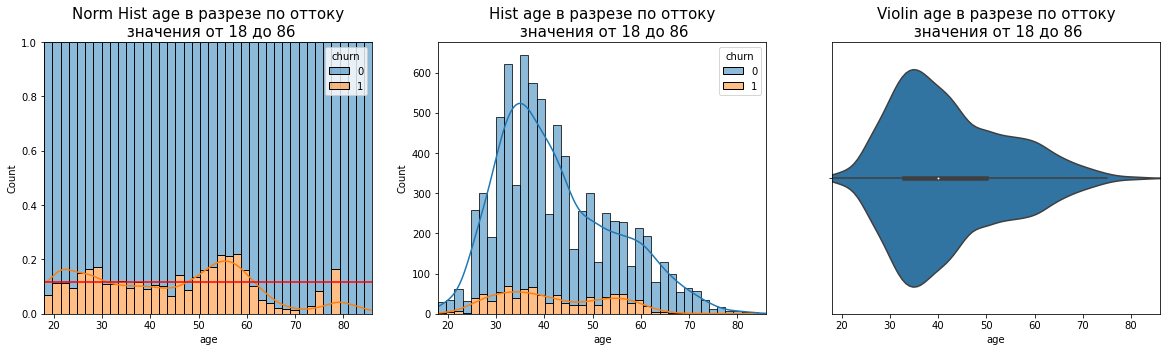

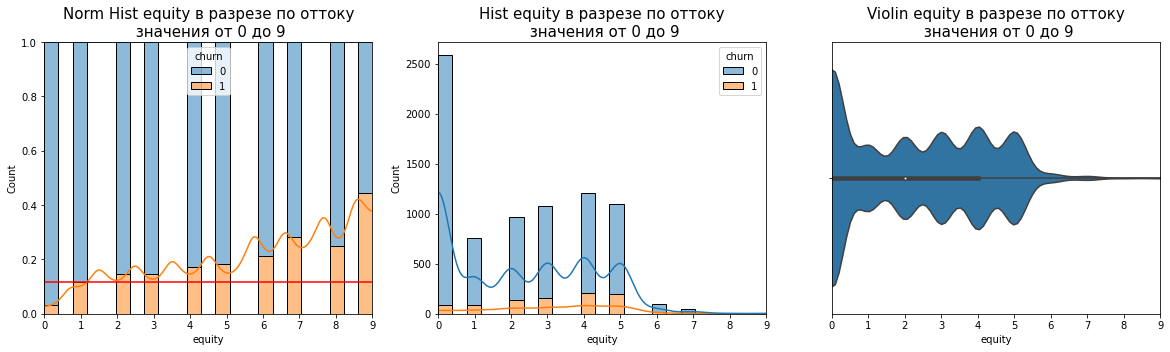

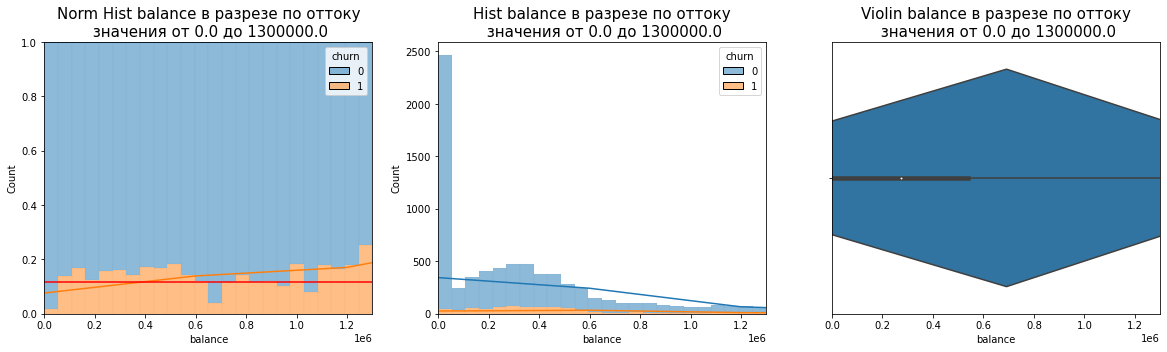

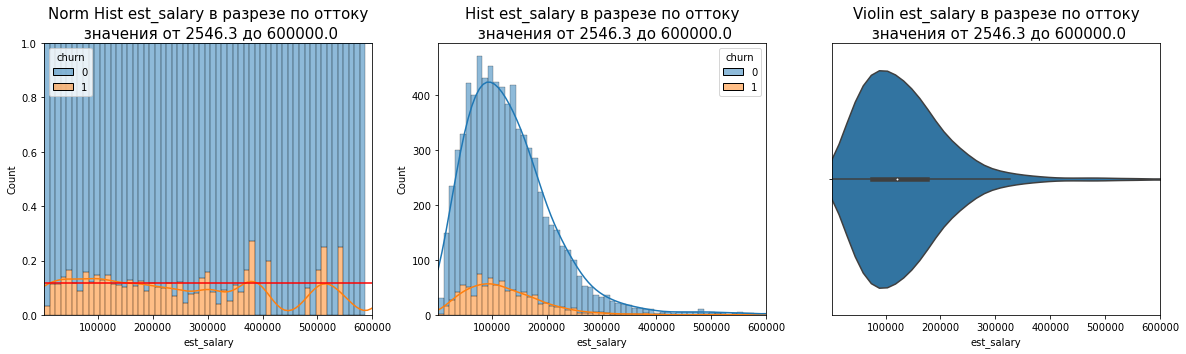

In [44]:
for i, col in enumerate(num_col[0:3]):
    hist_violin(data = df_new2, x = col, xlim = (min(df[col]), max(df[col])))
    
hist_violin(data = df_new2, x = 'balance', xlim = (min(df['balance']), 1.3e+06))
hist_violin(data = df_new2, x = 'est_salary', xlim = (min(df['est_salary']), 6e+05))

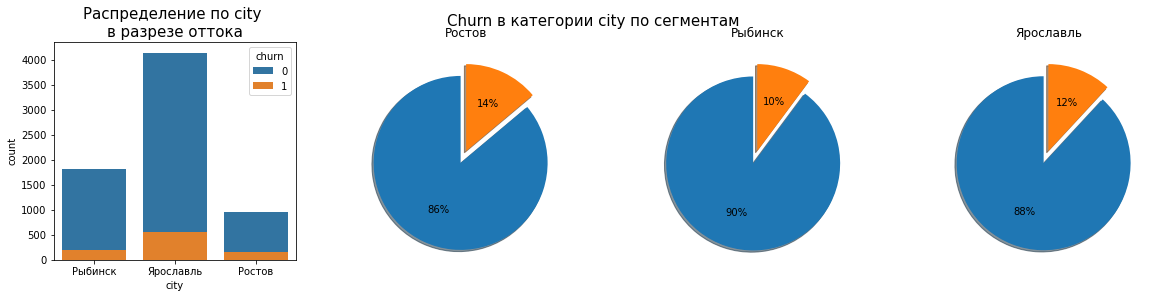

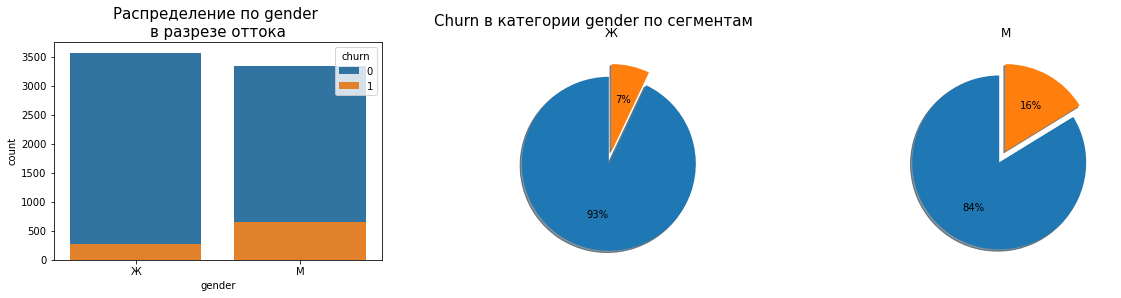

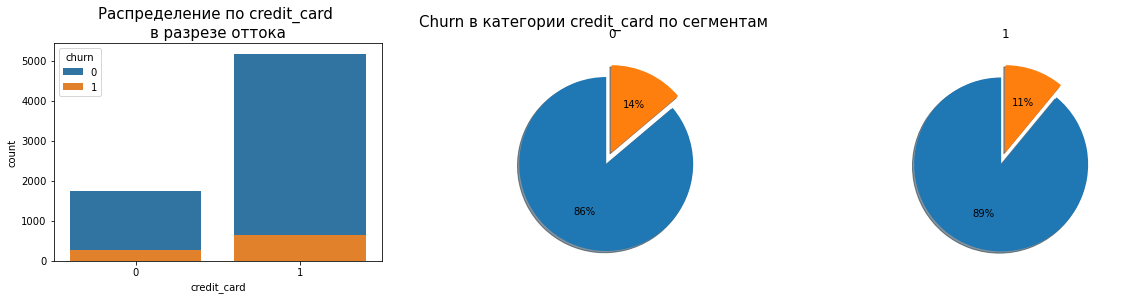

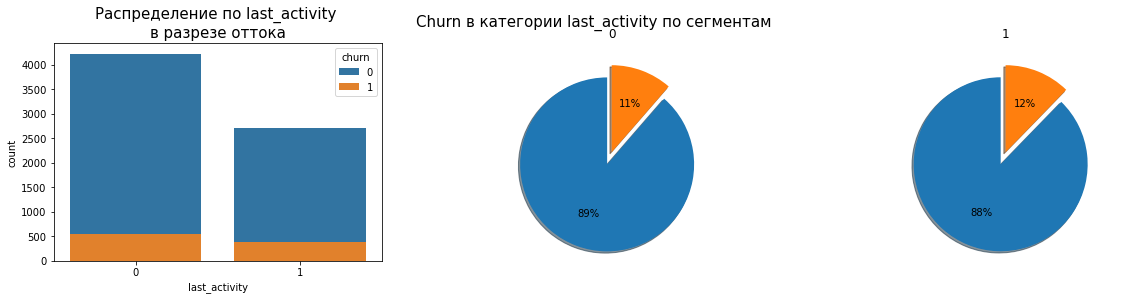

In [45]:
for cat in cat_col:
    countplot_pie(cat, data = df_new2)

In [46]:
# df_new['groups'] = 'others'
corr_matrix = pd.DataFrame(columns = [['score','age','equity','balance','products','credit_card','last_activity','est_salary','churn']])
for gr in groups:
#     index = set(df_new.index)
#     for feat in groups[gr]:
#         if feat in cat_col:
#             index -= set(df_new[~(df_new[feat] == groups[gr][feat][0])].index)
#         else:
#             index -= set(df_new[~((df_new[feat]>=groups[gr][feat][0]) & (df_new[feat]<=groups[gr][feat][1]))].index)       
    print(f'Корреляция на основе интервалов показателей {gr} :')
    
    corr_matrix = pd.concat([df_new[df_new['groups'] == gr][['score','age','equity','balance','products','credit_card','last_activity','est_salary','churn']].corr()[['churn']].T,corr_matrix])
    corr_matrix.rename(index={'churn': gr},inplace = True)
    corr_matrix = corr_matrix.take(range(0,8), axis = 1)

    display(groups[gr])

display(corr_matrix.style.background_gradient(cmap='coolwarm', axis=0))

Корреляция на основе интервалов показателей group_4 :


{'age': [47, 62],
 'score': [751, 940],
 'credit_card': [0],
 'gender': ['М'],
 'products': [2, 5]}

Корреляция на основе интервалов показателей group_3 :


{'age': [25, 40],
 'score': [751, 940],
 'credit_card': [0],
 'gender': ['М'],
 'products': [2, 5]}

Корреляция на основе интервалов показателей group_2 :


{'balance': [600000.0, 100000000.0], 'last_activity': [1], 'credit_card': [1]}

Корреляция на основе интервалов показателей group_1 :


{'products': [2, 5],
 'equity': [3, 10],
 'last_activity': [1],
 'credit_card': [0]}

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,score,age,equity,balance,products,credit_card,last_activity,est_salary
group_1,0.404954,-0.247562,0.170460,0.076134,-0.056790,nan,nan,0.161199
group_2,0.293854,-0.246665,0.069728,0.114641,0.331743,nan,nan,0.179465
group_3,0.286158,0.006694,0.152189,0.328373,0.133084,nan,-0.087083,0.129955
group_4,0.213127,0.024333,0.292150,0.350553,0.166456,nan,-0.190243,0.088560


### Высокооточные сегменты:

1) Сегмент 1, отток 46% (1166 клиентов, 538 отточные):

    * `Объектов собственности`: более 2х,
    * `Продуктов банка`: более 1 за исключением кредитной карты,
    * `Обращения в банк` в последнее время
    * `Кредитной карты` - нет

2) Сегмент 2, отток 37% (980 клиентов, 363 отточные):

    * `Баланс`: более 600тыс.,
    * `Обращения в банк` в последнее время
    * `Кредитная карта` - есть
 
3) Сегмент 3, отток 29% (256 клиентов, 73 отточные):

    * `Возраст`: 25 - 40л,
    * `score`: 751 - 940,
    * `Кредитной карты` - нет
    * `пол` мужской,
    * `Продуктов банка`: более 1 за исключением кредитной карты,
    
4) Сегмент 4, отток 29% (157 клиентов, 46 отточные):

    * `Возраст`: 47 - 62л,
    * `score`: 751 - 940,
    * `Кредитной карты` - нет
    * `пол` мужской,
    * `Продуктов банка`: более 1 за исключением кредитной карты,

<a class = "anchor" id = "6."></a>
### 6. Формулировка рекомендаций отделу маркетинга для воздействия на ключевые показатели для уменьшения `churn rate`.

* score от 740.
* age 25-34 и 46-59.
* balance от 0.6 млн.
* по equity зависимость оттока от их количества линейна, максимум по количесту userid приходится на 3-5.
* products максимум по количесту userid приходится на 3-5, минимальный отток у пользующихся 1 продуктом.
* gender мужчины более подвержены оттоку.
* credit_card по клиентам без кредитной карты отток выше.
* last_activity давно не имевшие активности уходят в отток чаще.

В качестве общих советов по уменьшению оттока можно привести:

- привлекать потенциальных пользователей кредитных карт со скорингом до 750.
- привлекать женскую аудиторию

По сегменту 1,3,4:

- провести мониторинг конкурентных продуктов кроме кредитной карты и предложить пересмотр условий по этим продуктами (накопительные счета, ипотечные программы, авто продукты и др.).
- предложить использование кредитной карты для них и родственников.

По сегменту 2:

- провести мониторинг конкурентных продуктов кроме кредитной карты и предложить пересмотр условий по этим продуктами (накопительные счета, ипотечные программы, авто продукты и др.).
- необходим анализ тем обращения для более конкретных выводов

# Подготовка данных для Tableau

Набор №1

1. Постройте диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавьте индикатор процента ушедших клиентов.
3. Добавьте фильтр дашборда по городу.

Набор №2

1. Постройте диаграмму, отображающую распределение заработной платы клиентов.
2. Добавьте индикатор, отображающий процент клиентов, имеющих кредитную карту.
3. Добавьте фильтр дашборда, позволяющий выбрать ушёл клиент или нет.

In [48]:
df_new[[
    'userid',
    'score',
        'city',
        'gender',
        'age',
        'equity',
        'balance',
        'products',
        'credit_card',
        'last_activity',
        'est_salary',
        'churn',
        'groups'
       ]].to_csv(
    path_or_buf='C:/Users/skyli/ВЫПУСКНОЙ ПРОЕКТ/df_new.csv',
    sep=',',
    header=True,
    index=False,
    encoding='Windows-1251'
)